In [13]:
# Importing Libraries
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv("C:/Users/aharo/OneDrive/Documents/GitHub/Resampling-Datetime-Data/Data/london_weather_MODIFIED - london_weather_MODIFIED.csv")

# Check initial rows
data.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [14]:
# Converting the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

# Setting 'date' as the index of the DataFrame
data.set_index('date', inplace=True)

# Filtering the data from the year 2000 onwards
data_filtered = data[data.index.year >= 2000]

# Keeping only the required columns
required_features = ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']
data_filtered = data_filtered[required_features]

# Checking the updated DataFrame
data_filtered.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


In [15]:
# Cheking for missing values in the filtered dataset
missing_values_summary = data_filtered.isnull().sum()
missing_values_summary

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

There are missing values in all the features. The 'snow_depth' feature has the most missing values, which is not surprising as it does not snow frequently in London.

Given the nature of our features, we can consider two imputation strategies:

1. For 'precipitation' and 'snow_depth', we can safely assume that if the value is missing, it means there was no precipitation or snow on that day. We can fill the missing values with 0.

2. For temperature-related features ('mean_temp', 'min_temp', 'max_temp'), it wouldn't be appropriate to fill missing values with 0, as that would significantly alter the data. Instead, we'll use forward fill method, which propagates the last valid observation forward.

In [16]:
# Imputing missing values for 'precipitation' and 'snow_depth' with 0
data_filtered['precipitation'].fillna(0, inplace=True)
data_filtered['snow_depth'].fillna(0, inplace=True)

# Using linear interpolation to impute missing values for 'mean_temp', 'min_temp', and 'max_temp'
data_filtered['mean_temp'].interpolate(method='linear', inplace=True)
data_filtered['min_temp'].interpolate(method='linear', inplace=True)
data_filtered['max_temp'].interpolate(method='linear', inplace=True)

# Checking for missing values again to confirm imputation
missing_values_after_imputation = data_filtered.isnull().sum()
missing_values_after_imputation

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Q1: What month had the most precipitation between 2000 through 2010?

To answer this question, we need to:

1. Resample the data as Monthly frequency.


2. Find the date and corresponding value for the max precipitation.


3. Plot the feature and time period that corresponds to the question (2000 through 2010).


4. Add a vertical line at the date with the max precipitation value.


5. Customize the plot according to the specified requirements.

In [17]:
# Resampling the data to a monthly frequency and taking the sum (since it's precipitation)
monthly_precipitation = data_filtered['precipitation'].resample('M').sum()

# Filtering the data for the period from 2000 to 2010
monthly_precipitation_2000_2010 = monthly_precipitation['2000':'2010']

# Finding the date and value for the maximum precipitation
max_precipitation_date = monthly_precipitation_2000_2010.idxmax()
max_precipitation_value = monthly_precipitation_2000_2010.max()

max_precipitation_date, max_precipitation_value

(Timestamp('2009-11-30 00:00:00'), 138.4)

The date with the most precipitation between 2000 and 2010 is November 2009, with a total of 138.4 inches.

Now, let's create a plot of precipitation for the period from 2000 through 2010. We'll add a vertical line at November 2009 to denote the month with the highest precipitation.

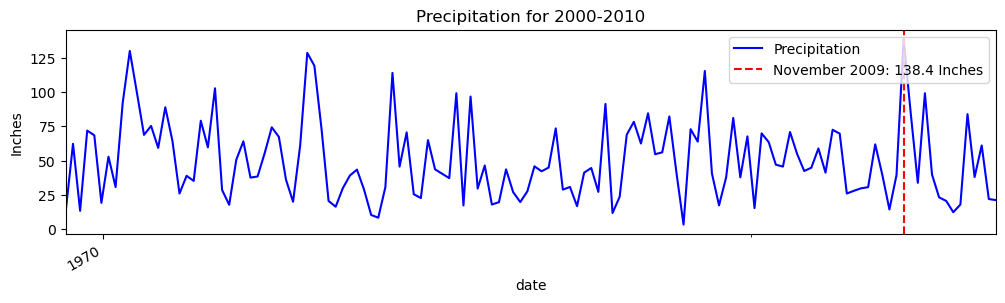

In [18]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

# Creating the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 3))

# Plotting the precipitation for 2000-2010
monthly_precipitation_2000_2010.plot(ax=ax, color='blue', label='Precipitation')

# Adding a vertical line for the date with the max precipitation value
ax.axvline(x=max_precipitation_date, color='red', linestyle='--', label=f'{max_precipitation_date.strftime("%B %Y")}: {max_precipitation_value} Inches')

# Customizing the plot
ax.set_title('Precipitation for 2000-2010')
ax.set_ylabel('Inches')
ax.legend(loc='upper right')

# Customizing the major x-axis ticks (every 1 year)
ax.xaxis.set_major_locator(MultipleLocator(365.25))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: pd.to_datetime(x).strftime('%Y')))

# Customizing the minor x-axis ticks (every 3 months)
ax.xaxis.set_minor_locator(MultipleLocator(365.25/4))

# Rotating the major ticks' labels 90 degrees
plt.xticks(rotation=90)

# Adjusting the x-axis date format
fig.autofmt_xdate()

plt.show()

- The blue line represents the monthly precipitation from 2000 to 2010.


- The red dashed line indicates the date with the maximum precipitation (November 2009), with a total of 138.4 inches.


The plot includes the required customizations, such as the title, ylabel, major x-axis ticks with 4-digit years, and minor x-axis ticks every 3 months.

# Q2: Which year between 2000-2020 had the coolest average temperature?

To answer this question, we need to:

1. Resample the data as Yearly frequency.


2. Find the date and corresponding value for the lowest mean temperature.


3. Plot the feature and time period that corresponds to the question (2000 through 2020).


4. Add a vertical line at the date with the lowest mean temperature value.


5. Customize the plot according to the specified requirements.


Let's start by resampling the data to a yearly frequency and finding the year with the lowest average temperature.

In [19]:
# Resampling the data to a yearly frequency and taking the mean of 'mean_temp' (average temperature)
yearly_mean_temp = data_filtered['mean_temp'].resample('Y').mean()

# Filtering the data for the period from 2000 to 2020
yearly_mean_temp_2000_2020 = yearly_mean_temp['2000':'2020']

# Finding the date and value for the lowest mean temperature
lowest_mean_temp_date = yearly_mean_temp_2000_2020.idxmin()
lowest_mean_temp_value = yearly_mean_temp_2000_2020.min()

lowest_mean_temp_date, lowest_mean_temp_value

(Timestamp('2010-12-31 00:00:00'), 10.657397260273973)

The year with the coolest average temperature between 2000 and 2020 is 2010, with an average temperature of approximately 10.66 degrees.

Next, we'll create the visualization for this question, following the specific requirements provided. We'll plot the average temperature for the years 2000-2020 and add a vertical line at the year with the lowest mean temperature value. Additionally, we'll customize the x-axis ticks and labels as specified.

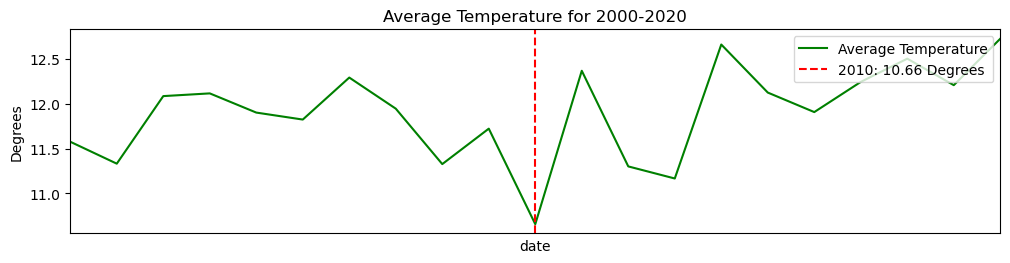

In [20]:
# Creating the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 3))

# Plotting the average temperature for 2000-2020
yearly_mean_temp_2000_2020.plot(ax=ax, color='green', label='Average Temperature')

# Adding a vertical line for the year with the lowest mean temperature value
ax.axvline(x=lowest_mean_temp_date, color='red', linestyle='--', label=f'{lowest_mean_temp_date.year}: {lowest_mean_temp_value:.2f} Degrees')

# Customizing the plot
ax.set_title('Average Temperature for 2000-2020')
ax.set_ylabel('Degrees')
ax.legend(loc='upper right')

# Customizing the major x-axis ticks (every 5 years)
ax.xaxis.set_major_locator(MultipleLocator(365.25 * 5))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: pd.to_datetime(x).strftime('%Y')))

# Customizing the minor x-axis ticks (every 1 year)
ax.xaxis.set_minor_locator(MultipleLocator(365.25))

# Rotating the major ticks' labels 90 degrees
plt.xticks(rotation=90)

# Adjusting the x-axis date format
fig.autofmt_xdate()

plt.show()

Here's the visualization for Question 2 (Q2):

- The green line represents the yearly average temperature from 2000 to 2020.


- The red dashed line indicates the year with the coolest average temperature (2010), with a value of approximately 10.66 degrees.


The plot includes the required customizations, such as the title, ylabel, major x-axis ticks every 5 years with 4-digit labels, and minor x-axis ticks every 1 year.